# Splitting the Data (Train/Test)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the processed data
df = pd.read_csv('../data/telco_churn_processed.csv')

# 2. Separate Features (X) and Target (y)
# X = All columns EXCEPT 'Churn'
# y = Only 'Churn'
X = df.drop('Churn', axis=1)
y = df['Churn']

# 3. Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape:  {X_test.shape}")

Training Data Shape: (5616, 30)
Testing Data Shape:  (1405, 30)


## Model 1: Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize the Model
# max_depth=5 limits the tree size so it doesn't memorize noise (Overfitting)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# 2. Train the Model
dt_model.fit(X_train, y_train)

# 3. Make Predictions on the  (Test Data)
y_pred_dt = dt_model.predict(X_test)

# 4. Evaluate Performance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# 5. Detailed Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7872

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1053
           1       0.60      0.46      0.52       352

    accuracy                           0.79      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.77      0.79      0.78      1405



## Visualize the Confusion Matrix.

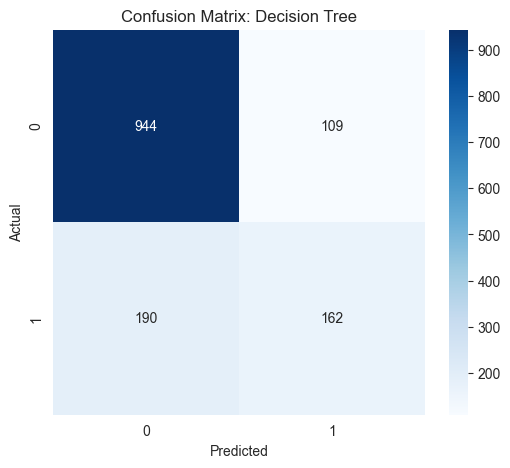

In [13]:
# Create a heatmap for the Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 2: Artificial Neural Network

In [15]:
import tensorflow as tf
import json
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# 1. Build the "Brain" Structure
model = Sequential([
    # Input Layer
    Input(shape=(X_train.shape[1],)),

    # Hidden Layer 1: 16 Neurons to find patterns
    Dense(16, activation='relu'),

    # Hidden Layer 2: 8 Neurons to refine thinking
    Dense(8, activation='relu'),

    # Output Layer: 1 Neuron (0 to 1 probability)
    Dense(1, activation='sigmoid')
])

# 2. Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the Model
#  store the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 4. Evaluate on the Test Set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Final Neural Network Accuracy: {accuracy:.4f}")

#Save the score to a file
score_data = {'baseline_accuracy': accuracy}
os.makedirs('../models', exist_ok=True)
with open('../models/baseline_score.json', 'w') as f:
    json.dump(score_data, f)

print("✅ Accuracy score saved to '../models/baseline_score.json' for automation.")

Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7444 - loss: 0.4880 - val_accuracy: 0.7705 - val_loss: 0.4579
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7907 - loss: 0.4417 - val_accuracy: 0.7918 - val_loss: 0.4395
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7952 - loss: 0.4330 - val_accuracy: 0.7918 - val_loss: 0.4340
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4289 - val_accuracy: 0.8007 - val_loss: 0.4302
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.4266 - val_accuracy: 0.7918 - val_loss: 0.4281
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - loss: 0.4236 - val_accuracy: 0.8025 - val_loss: 0.4249
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4216 - val_accuracy: 0.7954 - val_loss: 0.4243
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8077 - loss: 0.4190 - val_accuracy: 0.

In [8]:
# Save the trained model to the 'models' folder
model.save('../models/telco_churn_nn_model.keras')

print("✅ Model saved successfully to 'models/telco_churn_nn_model.keras'")

✅ Model saved successfully to 'models/telco_churn_nn_model.keras'


## Visualizing the "Learning Curve"

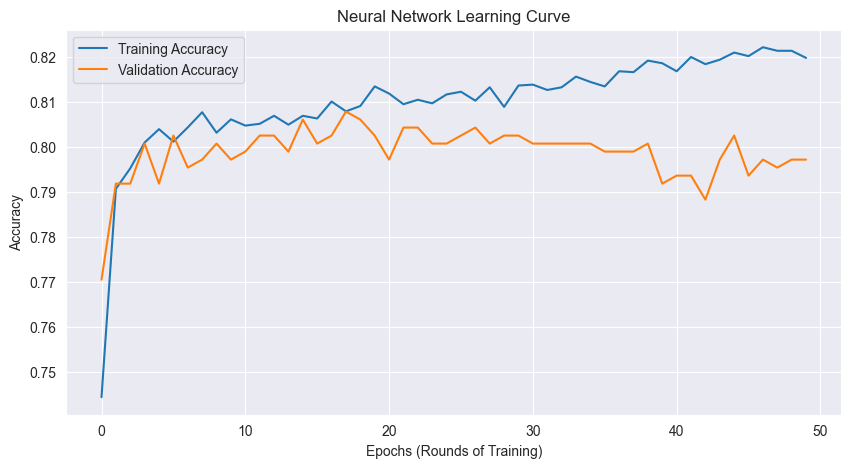

In [17]:
# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 5))

# Plot the accuracy lines
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Neural Network Learning Curve')
plt.xlabel('Epochs (Rounds of Training)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Comparison: ROC Curve Analysis

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


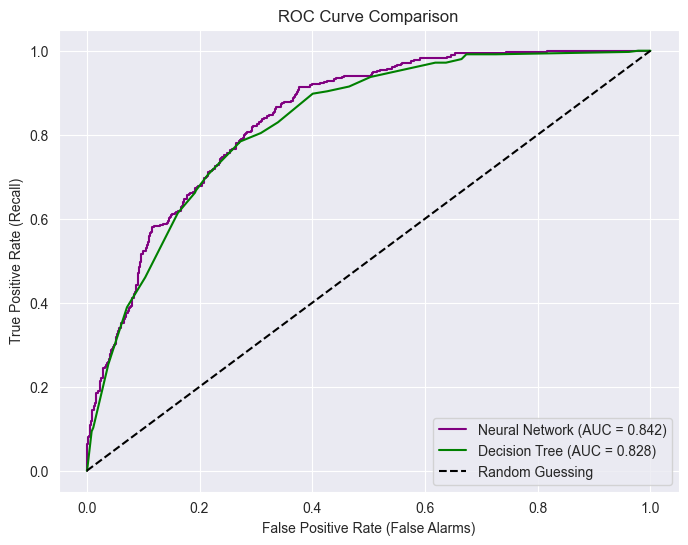

In [14]:
from sklearn.metrics import roc_curve, auc

# 1. Get Probabilities from Neural Network
y_pred_nn_prob = model.predict(X_test).ravel()

# 2. Get Probabilities from Decision Tree
y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]

# 3. Calculate ROC stats for Neural Network
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn_prob)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# 4. Calculate ROC stats for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# 5. Plot the Comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.3f})', color='purple')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing') # Dashed diagonal line

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()